In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../.venv/lib/python3.9/site-packages/')
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data_df = pd.read_pickle("../data/study-3_2022/tomcat_agent/estimates/logistic/score_regression_data.pkl")
data_df["prop"] = data_df['means'].apply(lambda v : np.sum(v > 0.5) / len(v))
data_df["order"] = data_df['trial'].apply(lambda trial : 1 if int(trial[1:]) % 2 != 0 else 2)
# data_df[data_df["trial"] == "T000699"].head()
data_df.head()

,trial,estimation_name,aggregation,mean,variance,means,variances,score,prop,order
0,T000812,continuous_in_phase_fixed_second_half,last,0.493073,0.143861,"[0.047425873177566774, 0.05210254849298898, 0....","[4.81482486096809e-35, 0.0006411722216523777, ...",360,0.297456,2
1,T000812,continuous_anti_phase_fixed_second_half,last,0.440571,0.147947,"[0.047425873177566774, 0.05210254849298898, 0....","[4.81482486096809e-35, 0.0006411722216523777, ...",360,0.508806,2
2,T000812,continuous_either_phase_fixed_second_half,last,0.630527,0.158860,"[0.047425873177566774, 0.05210254849298898, 0....","[4.81482486096809e-35, 0.0006411722216523777, ...",360,0.409002,2
3,T000812,continuous_in_phase_variable,all,0.424046,0.056647,"[0.047425873177566774, 0.05210254849298898, 0....","[4.81482486096809e-35, 0.0006411722216523777, ...",360,0.387255,2
4,T000812,continuous_anti_phase_variable,all,0.490053,0.047013,"[0.047425873177566774, 0.05210254849298898, 0....","[4.81482486096809e-35, 0.0006411722216523777, ...",360,0.482353,2


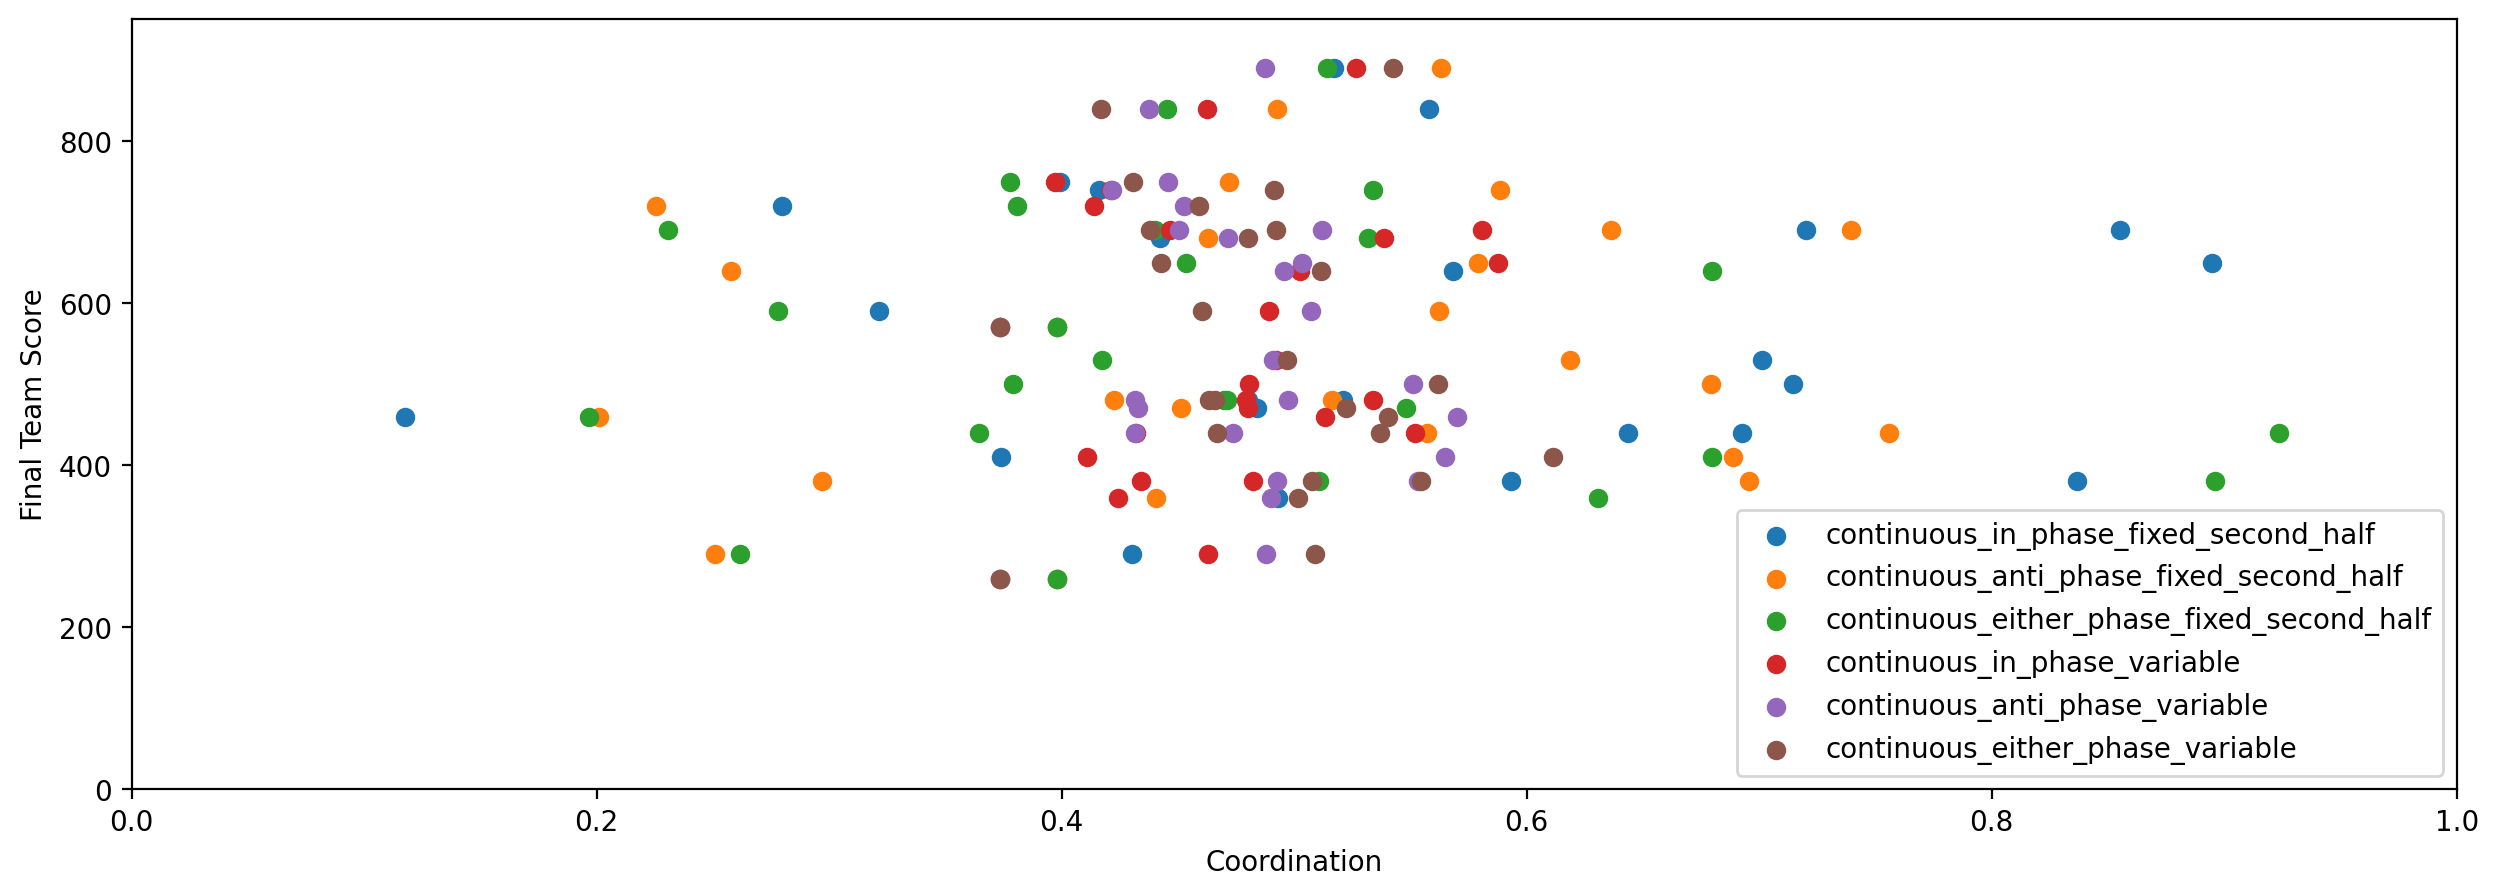

In [5]:
fig = plt.figure(figsize=(15,5))
for estimation_name in data_df["estimation_name"].unique():
    coordinations = data_df[data_df["estimation_name"] == estimation_name]["mean"]
    scores = data_df[data_df["estimation_name"] == estimation_name]["score"]
    plt.scatter(coordinations, scores, label=estimation_name)
plt.xlabel("Coordination")
plt.ylabel("Final Team Score")
plt.xlim([0, 1])
plt.ylim([0, 950])
plt.legend()

/var/folders/xy/pk0wh2pd6x12m__j8r7ql0f40000gs/T/ipykernel_71645/4229746324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimates_df.drop(index=estimates_df[(estimates_df["trial"] == "T000699") | (estimates_df["trial"] == "T000700")].index, axis=0, inplace=True)


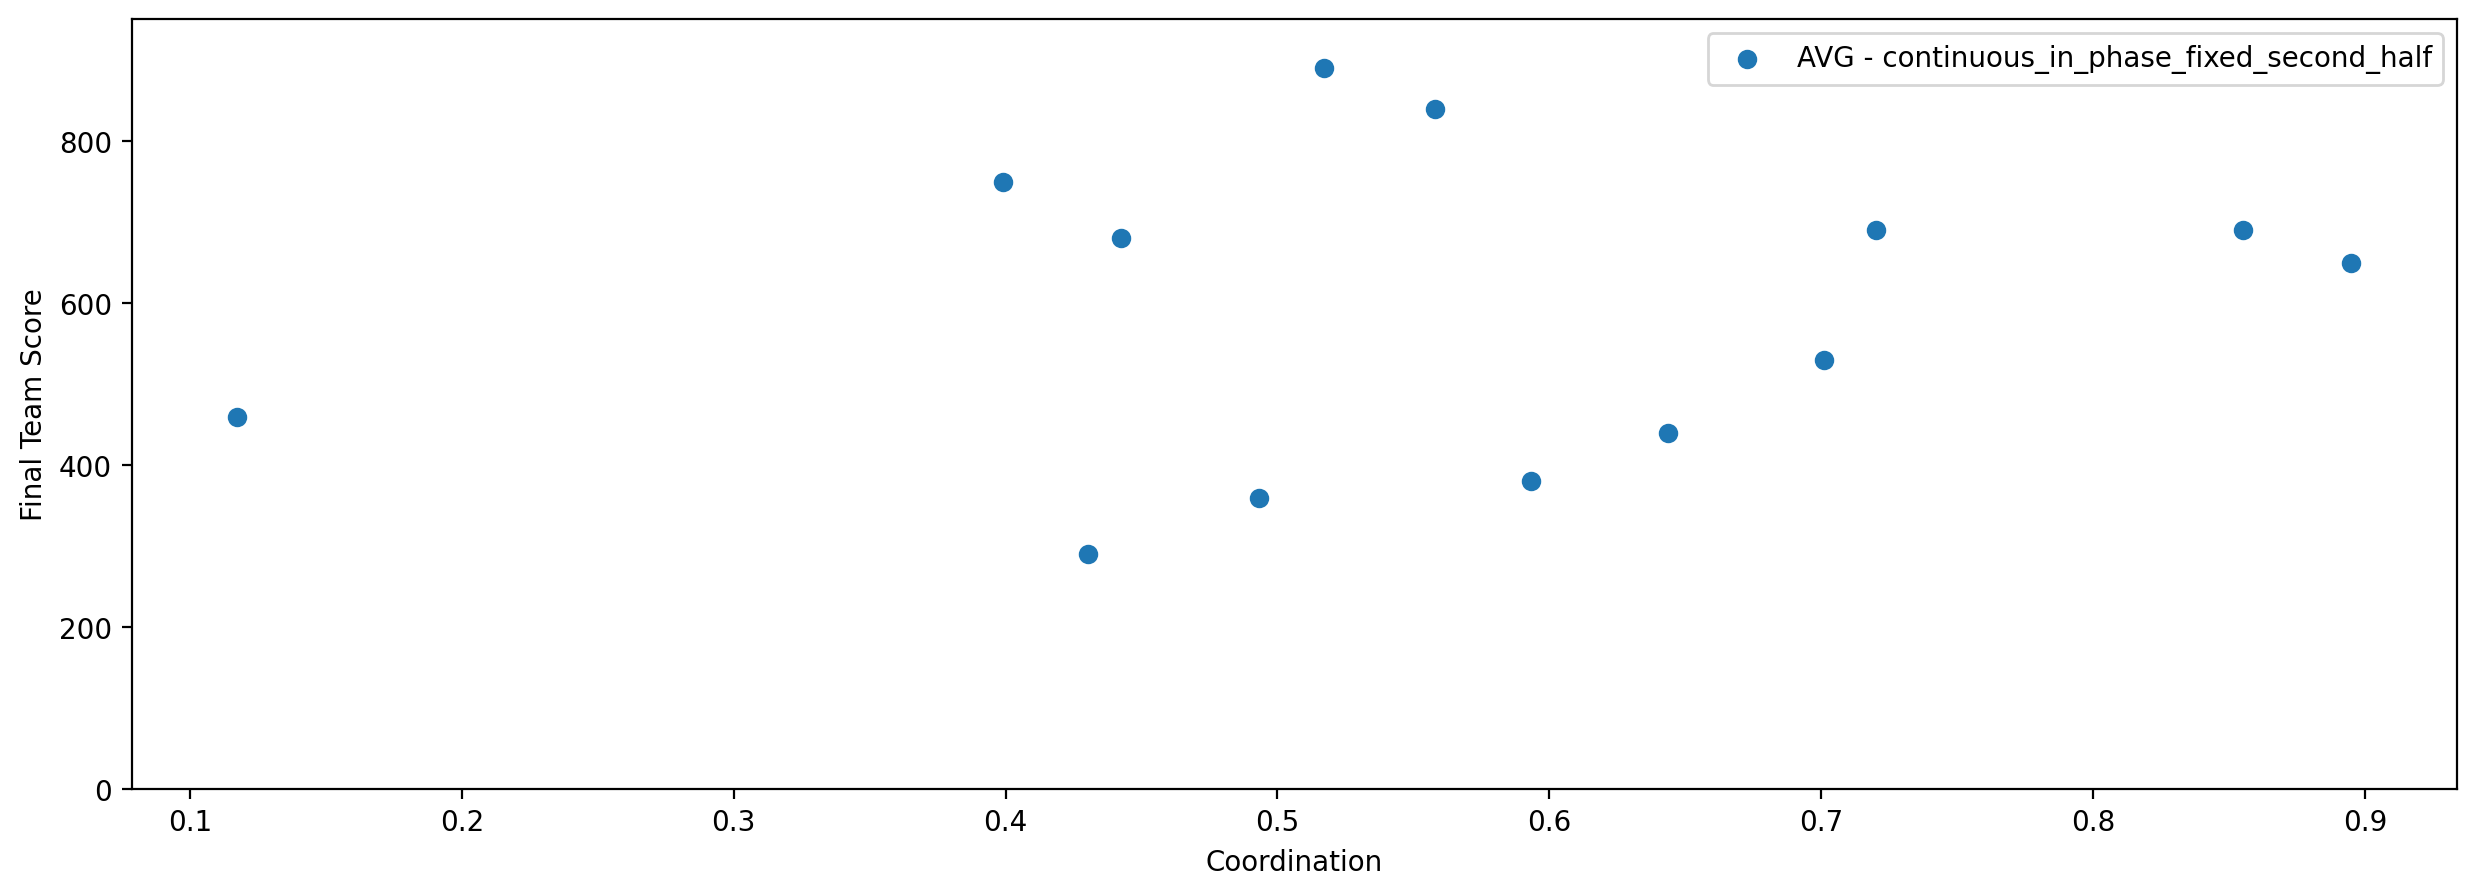

In [12]:
fig = plt.figure(figsize=(15,5))
for estimation_name in ["continuous_in_phase_fixed_second_half"]: #["continuous_in_phase_fixed_second_half", "continuous_in_phase_variable"]:
    estimates_df=data_df[(data_df["estimation_name"] == estimation_name) & (data_df["order"] == 2)]
    estimates_df.drop(index=estimates_df[(estimates_df["trial"] == "T000699") | (estimates_df["trial"] == "T000700")].index, axis=0, inplace=True)
    avg_coordination = estimates_df["mean"]
    var_coordination = estimates_df["variance"]
    prop_coordination = estimates_df["prop"]
    scores = estimates_df["score"]
    plt.scatter(avg_coordination, scores, label=f"AVG - {estimation_name}")
#     plt.scatter(var_coordination, scores, label=f"VAR - {estimation_name}")

#     plt.scatter(prop_coordination, scores, label=f"% - {estimation_name}")
    
#     for trial in estimates_df["trial"]: 
#         x = estimates_df[estimates_df["trial"] == trial]["mean"]
#         y = estimates_df[estimates_df["trial"] == trial]["score"] - 3
#         plt.annotate(trial, (x, y))
    
plt.xlabel("Coordination")
plt.ylabel("Final Team Score")
# plt.xlim([0, 1])
plt.ylim([0, 950])
plt.legend()

In [60]:
estimates_df["means"]

3      [0.0, 0.07980189747443547, 0.11263449149371631...
9      [0.0, 0.07980189758101248, 0.1126345206511937,...
15     [0.0, 0.07980189757983465, 0.11263452032895709...
21     [0.0, 0.07980189757983674, 0.1126345203295318,...
27     [0.0, 0.07980189758347886, 0.11263452132594762...
33     [0.0, 0.07980189757983668, 0.11263452032951429...
39     [0.0, 0.07980189516551861, 0.1126338598173161,...
45     [0.0, 0.07980189757983465, 0.11263452032895793...
51     [0.0, 0.07980189757983465, 0.1126345203289574,...
57     [0.0, 0.07980189757983465, 0.11263452032895799...
63     [0.0, 0.07980189758124955, 0.11263452071604925...
69     [0.0, 0.07980189757983465, 0.11263452032895793...
75     [0.0, 0.07980189757983465, 0.11263452032895795...
81     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
87     [0.0, 0.07980189757983466, 0.11263452032895926...
93     [0.0, 0.07980189757983465, 0.1126345203289573,...
99     [0.0, 0.0798018978238372, 0.11263458708348953,...
105    [0.0, 0.0798018975798346

In [ ]:
# Constants
NUM_TIME_STEPS = 17 * 60 #(17 minutes of mission in seconds)
M = int(NUM_TIME_STEPS/2) # We assume coordination in the second half of the period is constant
NUM_FEATURES = 2 # Pitch and Intensity

# Common parameters
MEAN_PRIOR_A = np.zeros(NUM_FEATURES)
MEAN_PRIOR_B = np.zeros(NUM_FEATURES)
STD_PRIOR_A = np.ones(NUM_FEATURES)
STD_PRIOR_B = np.ones(NUM_FEATURES)
ANTIPHASE_FUNCTION = lambda x, s: -x if s == 0 else x
ANYPHASE_FUNCTION = lambda x, s: np.abs(x)

# Parameters of the discrete model
P_COORDINATION_TRANSITION = 0.1 # Coordination changes with small probability
P_COORDINATION = 0 # The process starts with no coordination
STD_UNCOORDINATED_A = np.ones(NUM_FEATURES)
STD_UNCOORDINATED_B = np.ones(NUM_FEATURES)
STD_COORDINATED_A = np.ones(NUM_FEATURES)
STD_COORDINATED_B = np.ones(NUM_FEATURES)

# Parameters of the continuous model
MEAN_COORDINATION_PRIOR = 0; STD_COORDINATION_PRIOR = 0 # The process starts with no coordination
STD_COORDINATION_DRIFT = 0.1 # Coordination drifts by a little
STD_COUPLING_A = np.ones(NUM_FEATURES)
STD_COUPLING_B = np.ones(NUM_FEATURES)

In [38]:
def get_discrete_inference_engine(series_a: SparseSeries, series_b: SparseSeries, f: Optional[Callable] = lambda x, s : x):
    return DiscreteCoordinationInferenceFromVocalics(series_a=series_a, 
                                                     series_b=series_b, 
                                                     p_prior_coordination=P_COORDINATION, 
                                                     p_coordination_transition=P_COORDINATION_TRANSITION, 
                                                     mean_prior_a=MEAN_PRIOR_A,
                                                     mean_prior_b=MEAN_PRIOR_B,
                                                     std_prior_a=STD_PRIOR_A,
                                                     std_prior_b=STD_PRIOR_B,
                                                     std_uncoordinated_a=STD_UNCOORDINATED_A,
                                                     std_uncoordinated_b=STD_UNCOORDINATED_B,
                                                     std_coordinated_a=STD_COORDINATED_A,
                                                     std_coordinated_b=STD_COORDINATED_B,
                                                     f=f)

def get_continuous_inference_engine(series_a: SparseSeries, series_b: SparseSeries, f: Optional[Callable] = lambda x, s : x):
    return ContinuousCoordinationInferenceFromVocalics(series_a=series_a, 
                                                       series_b=series_b, 
                                                       mean_prior_coordination=MEAN_COORDINATION_PRIOR, 
                                                       std_prior_coordination=STD_COORDINATION_PRIOR, 
                                                       std_coordination_drifting=STD_COORDINATION_DRIFT,
                                                       mean_prior_a=MEAN_PRIOR_A,
                                                       mean_prior_b=MEAN_PRIOR_B,
                                                       std_prior_a=STD_PRIOR_A,
                                                       std_prior_b=STD_PRIOR_B,
                                                       std_coupling_a=STD_COUPLING_A,
                                                       std_coupling_b=STD_COUPLING_B,
                                                       f=f)

100%|██████████| 5/5 [01:02<00:00, 12.45s/it]


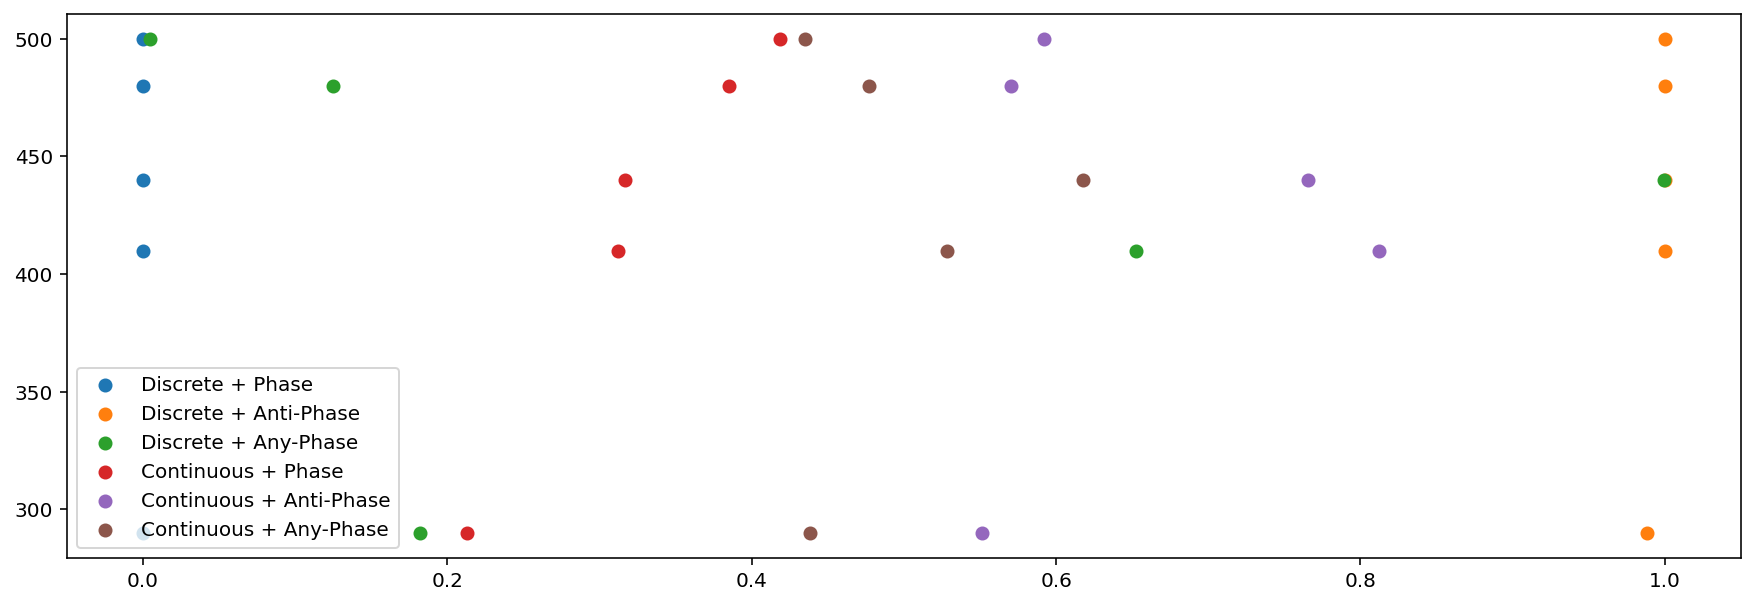

In [41]:
trials = ["T000745","T000821","T000822","T000841","T000853"]  # "T000842" "T000854"
scores = []
discrete_phase_probs = []
discrete_anti_phase_probs = []
discrete_any_phase_probs = []
continuous_phase_means = []
continuous_anti_phase_means = []
continuous_any_phase_means = []

logging.disable(logging.CRITICAL)

for trial_number in tqdm(trials):
    trial = Trial.from_directory(f"../data/study-3_2022/{trial_number}/") 
    vocalics_component = VocalicsComponent.from_trial_directory(f"../data/study-3_2022/{trial_number}/") 
    vocalics_a, vocalics_b = vocalics_component.sparse_series(NUM_TIME_STEPS)
    vocalics_a.normalize()
    vocalics_b.normalize()
    
    discrete_phase_inference_engine = get_discrete_inference_engine(vocalics_a, vocalics_b)
    discrete_antiphase_inference_engine = get_discrete_inference_engine(vocalics_a, vocalics_b, ANTIPHASE_FUNCTION)
    discrete_anyphase_inference_engine = get_discrete_inference_engine(vocalics_a, vocalics_b, ANYPHASE_FUNCTION)
    continuous_phase_inference_engine = get_continuous_inference_engine(vocalics_a, vocalics_b)
    continuous_antiphase_inference_engine = get_continuous_inference_engine(vocalics_a, vocalics_b, ANTIPHASE_FUNCTION)
    continuous_anyphase_inference_engine = get_continuous_inference_engine(vocalics_a, vocalics_b, ANYPHASE_FUNCTION)
    
    scores.append(trial.metadata.team_score)
    discrete_phase_probs.append(discrete_phase_inference_engine.estimate_marginals()[1, -1])
    discrete_anti_phase_probs.append(discrete_antiphase_inference_engine.estimate_marginals()[1, -1])
    discrete_any_phase_probs.append(discrete_anyphase_inference_engine.estimate_marginals()[1, -1])
    continuous_phase_means.append(continuous_phase_inference_engine.estimate_means_and_variances()[0, -1])
    continuous_anti_phase_means.append(continuous_antiphase_inference_engine.estimate_means_and_variances()[0, -1])
    continuous_any_phase_means.append(continuous_anyphase_inference_engine.estimate_means_and_variances()[0, -1])
    
fig = plt.figure(figsize=(15,5))
plt.scatter(discrete_phase_probs, scores, label="Discrete + Phase")
plt.scatter(discrete_anti_phase_probs, scores, label="Discrete + Anti-Phase")
plt.scatter(discrete_any_phase_probs, scores, label="Discrete + Any-Phase")
plt.scatter(continuous_phase_means, scores, label="Continuous + Phase")
plt.scatter(continuous_anti_phase_means, scores, label="Continuous + Anti-Phase")
plt.scatter(continuous_any_phase_means, scores, label="Continuous + Any-Phase")
plt.legend()

Text(0, 0.5, 'Final Team Score')

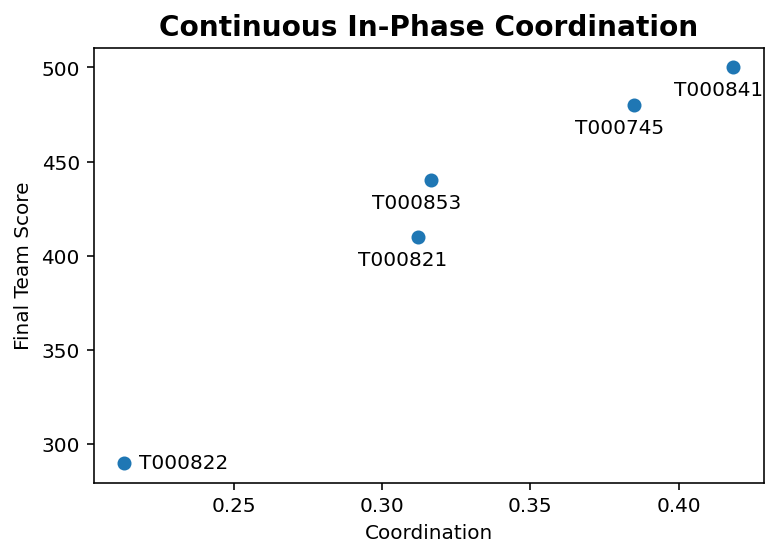

In [45]:
fig = plt.figure(figsize=(6,4))

plt.scatter(continuous_phase_means, scores)
for i, trial_number in enumerate(trials):
    if trial_number == "T000822":
        plt.annotate(trial_number, (continuous_phase_means[i] + 0.005, scores[i] - 3))
    else:
        plt.annotate(trial_number, (continuous_phase_means[i] - 0.02, scores[i] - 15))
plt.title("Continuous In-Phase Coordination", fontsize=14, weight="bold")
plt.xlabel("Coordination")
plt.ylabel("Final Team Score")